Assignment 1

In [1]:
import pandas as pd
#Change the path to the downloaded file
xlsx = 'C:/Users/tygoh/Downloads/2020_jaarboek_941_4eccf4d8b6.xlsx'
df = pd.read_excel(xlsx)

#from txt to NaN, so it is all numeric
df['totaal fosfor'] = pd.to_numeric(df['totaal fosfor'], errors='coerce')

column1 = 'totaal fosfor'

min_value = df[column1].min()
max_value = df[column1].max()

print(f"Minimum value in {column1} : {min_value}")
print(f"Maximum value in {column1} : {max_value}")

Minimum value in totaal fosfor : 0.02
Maximum value in totaal fosfor : 2.03


Assignment 2

In [2]:
# How much is 33% of the 7350 registered vessels?
      
number_boats = 7350
percentage_electric = 33
electric_boats = (percentage_electric / 100) * number_boats
      
print(electric_boats)

2425.5


In [3]:
#550 boats out of 7350 are commercial vessels - percentage?

number_commercial = 550

percentage_commercial = (100/number_boats) * number_commercial

print(percentage_commercial)

7.482993197278911


In [4]:
#amout of necessary lifeboats and supportboats
average_amount = 1/500
lenght = 5000
start_boat = 1
communication = 2
buffer = 1

amount_boats = lenght * average_amount + start_boat + communication + buffer
print(amount_boats)

14.0


In [5]:
#Energy for electric boat motors (amount_boats is extracted from last code snippet)
             
kWh = 15.5
hours_per_day = 2
days = 7
            
energy_use = kWh * hours_per_day * days * amount_boats
enery_price = energy_use * 0.12
      
print(energy_use)
print(enery_price)

3038.0
364.56


Assignment 3

In [6]:
# Assignment 3.1
# What will Amsterdam receive from tourist tax?
# The event lasts a week with 30.000 visitors

import pandas as pd

# Airbnb tax
Airbnb_visitors = 30000 * 0.12 # 12% stays at Airbnb
Airbnb_appartments = Airbnb_visitors / 3 # based on average occupation of 3

bnb_data = pd.read_csv('listings.csv') 
bnb_price = bnb_data['price'].mean()
print("The mean price of Airbnbs in Amsterdam is:", bnb_price)

Airbnb_tax = (bnb_price * Airbnb_appartments) * 0.1
Airbnb_tax_week = Airbnb_tax * 7
print(Airbnb_tax_week)

# Hotel direct tax
direct_tax = 25000 * 3
direct_tax_week = direct_tax * 7
print(direct_tax_week)

# Hotel indirect tax
average_price = 189 # average hotel price september 2023
hotel_rooms = 12500 # based on average occupation of 2
indirect_tax = (average_price * hotel_rooms) * 0.07
indirect_tax_week = indirect_tax * 7
print(indirect_tax_week)

# Total tourist tax
total_tax = Airbnb_tax_week + direct_tax_week + indirect_tax_week
print(total_tax, "euro")
      

The mean price of Airbnbs in Amsterdam is: 254.48986405914619
213771.4858096828
525000
1157625.0000000002
1896396.485809683 euro


In [7]:
# Assignment 3.2

import pandas as pd
import plotly.express as px

# Plot the amount of AirBnB locations per neighborhood
bnb_data = pd.read_csv('listings.csv')

neighbourhood = bnb_data['neighbourhood'].value_counts().reset_index()
neighbourhood.columns = ['neighbourhood', 'count']
print(neighbourhood)

fig = px.bar(neighbourhood, x='neighbourhood', y='count', title='number of AirBnB locations per neighbourhood in Amsterdam')
fig.update_xaxes(title='neighbourhood')
fig.update_yaxes(title='number of AirBnBs') 
fig.show() 

                             neighbourhood  count
0                   De Baarsjes - Oud-West   1382
1                             Centrum-West   1006
2                  De Pijp - Rivierenbuurt    935
3                             Centrum-Oost    793
4                                     Zuid    599
5                               Westerpark    584
6                                 Oud-Oost    506
7                            Bos en Lommer    424
8                                Oud-Noord    402
9   Oostelijk Havengebied - Indische Buurt    320
10                         Watergraafsmeer    262
11                              Noord-West    218
12                IJburg - Zeeburgereiland    183
13                             Slotervaart    164
14                              Noord-Oost    137
15                 Geuzenveld - Slotermeer    116
16                  Buitenveldert - Zuidas    100
17                  De Aker - Nieuw Sloten     74
18                   Gaasperdam - Driemond     51


In [9]:
# Assignment 3.3
# Which street in Amsterdam has the most AirBnB apartments?
# Takes almost an hour to run
from geopy.geocoders import Nominatim
import pandas as pd
import os.path

bnb_data = pd.read_csv('listings.csv')
location = bnb_data.groupby(['latitude', 'longitude']).size().reset_index(name='count') 

geolocator = Nominatim(user_agent="airbnb_geocoder") 
def get_street_from_location(lat, lon):
    try: 
        location_info = geolocator.reverse((lat,lon), exactly_one=True) 
        return location_info.address
    except: 
        return "N/A"

location['street'] = location.apply(lambda row: get_street_from_location(row['latitude'], row['longitude']), axis=1) 

most_popular_location = location.sort_values(by='count', ascending=False).iloc[0]
print("The street with the most Airbnb listings in Amsterdam is:", most_popular_location['street']) 
print("Number of Airbnb listings in this street:", most_popular_location['count'])

Number of apartments used as normal housing: 8386
Gemiddelde beschikbaarheid per jaar: 82.82506558549964


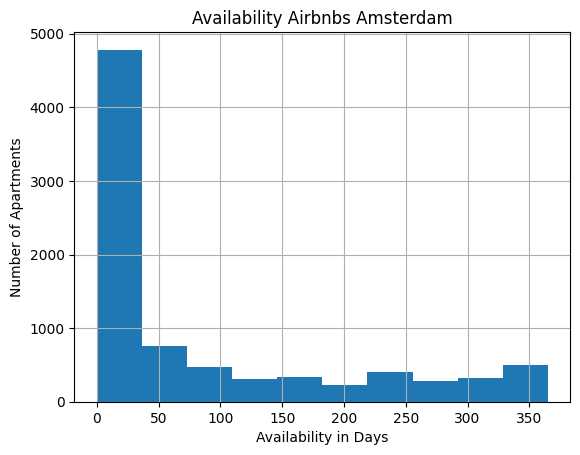

In [9]:
# Assignment 3.4
# Which number of apartments are not rented out all the time?

import pandas as pd
import matplotlib.pyplot as plt

threshold = 365
availability = bnb_data['availability_365']<365
housing = availability.shape[0]
print("Number of apartments used as normal housing:", housing)

gem_availability = bnb_data['availability_365'].mean()
print("Gemiddelde beschikbaarheid per jaar:", gem_availability)

bnb_data.hist(column='availability_365') 
plt.title("Availability Airbnbs Amsterdam") 
plt.xlabel("Availability in Days") 
plt.ylabel("Number of Apartments") 
plt.show()  

In [10]:
# Assignment 3.5
# How many hotel rooms should be built to accommodate Airbnb tourists

bnb_df = pd.read_csv('listings.csv') 
split_name = bnb_df['name'].str.split('·', expand=True)
split_name.columns = ['Property', 'Rating', 'Bedrooms', 'Beds', 'Baths']
bnb_df = pd.concat([bnb_df, split_name], axis=1)
print(bnb_df)

print(bnb_df['Beds'])
bnb_df['Beds'] = bnb_df['Beds'].str.extract('([\d.]+)').astype(float)
print(bnb_df['Beds'])

total_beds = int(bnb_df['Beds'].sum())
print("Totaal aantal bedden:", total_beds)

                      id                                               name  \
0                 761411  Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...   
1                 768274  Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...   
2                 768737  Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...   
3                 771217  Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...   
4                 771343  Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...   
...                  ...                                                ...   
8381  971403658453358540  Rental unit in Amsterdam · ★New · 1 bedroom · ...   
8382  971600466535392582  Home in Amsterdam · ★New · 3 bedrooms · 3 beds...   
8383  971686543447319533  Rental unit in Amsterdam · ★New · 1 bedroom · ...   
8384  971758168481363169  Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...   
8385  972218247170836285  Condo in Amsterdam · ★New · 2 bedrooms · 1 bed...   

        host_id host_name  neighbourhood_group     

In [11]:
# Assignment 3.6
# How many different licenses are issued?

licenses = bnb_data['license'].nunique()
print("Number of different licenses issued:", licenses)
print(len(bnb_data))

license_count = bnb_data['license'].value_counts()
mostissued = license_count.max()
print("The most issued license holder has", mostissued)

Number of different licenses issued: 7288
8386
The most issued license holder has 609


Assignment 4

In [12]:
import geopandas as gpd

# Read the file made on the internet
line_data = gpd.read_file('C:/Users/tygoh/Downloads/map.geojson')

# Calculate the middle of the line and coordinates
midpoint = line_data.geometry.interpolate(0.5, normalized=True)

print(midpoint)

0    POINT (4.89871 52.36383)
dtype: geometry


C:\Users\tygoh\AppData\Local\Temp\ipykernel_9436\2361481299.py:7: UserWarning:

Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [13]:
amount_of_people = 32 * 175
print(amount_of_people)

5600


In [14]:
amount_of_people = 20 * 150
print(amount_of_people)

3000
